In [7]:
import glob
import pandas as pd
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [72]:
def get_letter(beam='gt1l', file=files[2]):
    with h5py.File(file,'r') as f:
        if (beam not in list(f.keys())): return
        if ('heights' not in list(f[beam].keys())): return
        beam_lat = f[f'/{beam}/heights/lat_ph'][:]
        beam_lon = f[f'/{beam}/heights/lon_ph'][:]
        f.close()
    letter_lon = 'E'
    letter_lat = 'N'
    print('lon, lat:', beam_lon[0], beam_lat[0])
    if beam_lat[0] < 0:
            letter_lat = 'S'
    if beam_lon[0] < 0:
            letter_lon = 'W'
    return letter_lon, letter_lat

In [69]:
# Get a list of folders
directory_path = '../data/atl03_data'
folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder)) and folder.startswith('E')]

In [70]:
folders

['E169S14', 'E116S3']

In [76]:
# rename wrong folder 

for folder in folders:
    f_path = '../data/atl03_data/' + folder + '/processed_ATL03_*.h5'
    files = glob.glob(f_path)
    for file in files:
        #if 'processed_ATL03_20190502040024_05170314_006_02.h' in f:
        for b in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
            if get_letter(beam=b, file=file):
               letter_lon, letter_lat=get_letter(beam=b, file=file)
               break
        if letter_lat:
            break
    
    new_name = folder.replace('S', letter_lon).replace('N', letter_lat)
    print(folder , new_name)
    #os.rename('../data/atl03_data/'+ folder, '../data/atl03_data/'+ new_name)

lon, lat: 16.99485079211363 -1.3000999304805896
lon, lat: 16.99485079211363 -1.3000999304805896
E169S14 E169E14
lon, lat: 11.67963174910396 -0.2022334006842988
lon, lat: 11.67963174910396 -0.2022334006842988
E116S3 E116E3


In [48]:
# rename 
os.rename('../data/atl03_data/S169N14', '../data/atl03_data/E169S14')

In [17]:
files = glob.glob('../data/atl03_data/S116N3/processed_ATL03_*.h5')
#file_path = '../result/atl03_data_csir_agincourt/processed_ATL03_20181101124049_05170114_006_02.h5'
print(len(files))
os.path.basename(files[3])

35


'processed_ATL03_20210724141540_04721214_006_01.h5'

In [18]:
import h5py
# Assuming 'filename' is the path to your HDF5 file
with h5py.File(files[2], 'r') as f:
        # Get all keys
        all_keys = list(f['gt3l'].keys())
        print(all_keys)
        f.close()

['bckgrd_atlas', 'geolocation', 'geophys_corr', 'heights', 'signal_find_output']


In [21]:
def plot_photon(beam='gt1l', file=files[1]):
        with h5py.File(file,'r') as f:
            if (beam not in list(f.keys())): return
            if ('heights' not in list(f[beam].keys())): return
            beam_lat = f[f'/{beam}/heights/lat_ph'][:]
            beam_lon = f[f'/{beam}/heights/lon_ph'][:]
            beam_height = f[f'/{beam}/heights/h_ph'][:]
            beam_dist_ph = f[f'/{beam}/heights/dist_ph_along'][:]
            beam_signal_conf_ph = f[f'/{beam}/heights/signal_conf_ph'][:][:, 0]
            f.close()
        geometry = gpd.points_from_xy(beam_lon, beam_lat)
        df = {'Latitude': beam_lat, 'Longitude': beam_lon, 
              'Photon_Height': beam_height,'Along_track_distance':beam_dist_ph,
             'signal_conf_ph': beam_signal_conf_ph}
        gdf = gpd.GeoDataFrame(df,geometry=geometry, crs='EPSG:4326')
        print(gdf.head())
        # 0=noise. 1=added to allow for buffer but algorithm
        # classifies as background; 2=low; 3=med; 4=high)
        gdf = gdf[(gdf['signal_conf_ph'] == 4)| (gdf['signal_conf_ph'] == 3) | (gdf['signal_conf_ph'] == 2)]
        if len(gdf) < 100: return
        # View the resulting geopandas dataframe
        #print(gdf.head())
        fig, ax = plt.subplots(figsize=(10, 3))
        #gdf.Photon_Height.plot(ax=ax, ls='', marker='.', ms=1)
        # Create a line plot
        plt.scatter(gdf.Latitude, gdf.Photon_Height, marker='.', color='b', label='Data Points', s=1)
        ax.set_xlabel('Latitude (degree)', fontsize=12);
        ax.set_ylabel('Photon Height (m)', fontsize=12)
        ax.set_title(beam+'_'+os.path.basename(file), fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        # Set x-axis limits
        #ax.set_xlim(-24.84,-24.785)
    #### zoom
        #ax.set_xlim(-24.82,-24.815) 
        #ax.set_ylim(570,600) 
        plt.show()

   Latitude  Longitude  Photon_Height  Along_track_distance  signal_conf_ph  \
0 -0.202233  11.679632     373.708618              3.443094               2   
1 -0.202268  11.679651     293.133240              7.073814               0   
2 -0.202279  11.679628     369.888519              8.441403               2   
3 -0.202690  11.679593     354.353485             14.054384               2   
4 -0.202697  11.679593     350.710205             14.772400               2   

                    geometry  
0  POINT (11.67963 -0.20223)  
1  POINT (11.67965 -0.20227)  
2  POINT (11.67963 -0.20228)  
3  POINT (11.67959 -0.20269)  
4  POINT (11.67959 -0.20270)  


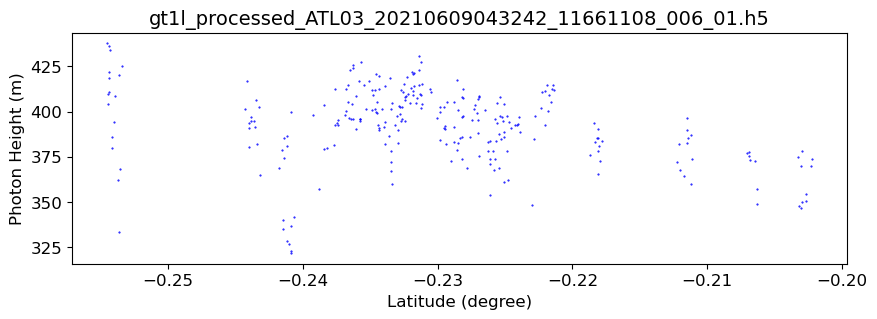

   Latitude  Longitude  Photon_Height  Along_track_distance  signal_conf_ph  \
0 -0.200014  11.679063     360.633423              6.160405               3   
1 -0.200013  11.679071     331.881073              6.027759               4   
2 -0.200039  11.679056     377.879456              9.070125               0   
3 -0.200051  11.679074     309.990204             10.170794               4   
4 -0.200077  11.679072     309.795654             12.998048               4   

                    geometry  
0  POINT (11.67906 -0.20001)  
1  POINT (11.67907 -0.20001)  
2  POINT (11.67906 -0.20004)  
3  POINT (11.67907 -0.20005)  
4  POINT (11.67907 -0.20008)  


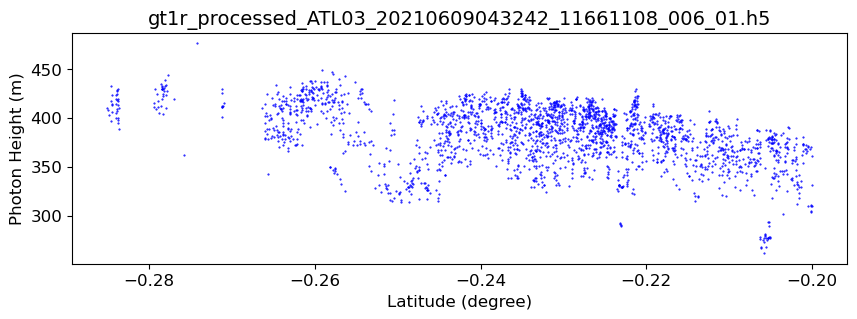

   Latitude  Longitude  Photon_Height  Along_track_distance  signal_conf_ph  \
0 -0.245623  11.646334     717.931885             15.803690               0   
1 -0.245735  11.646393     396.075439              7.478351               3   
2 -0.246043  11.646360     408.682129              1.548473               2   
3 -0.246113  11.646353     407.519501              9.381081               3   
4 -0.246152  11.646354     384.089172             13.675969               3   

                    geometry  
0  POINT (11.64633 -0.24562)  
1  POINT (11.64639 -0.24574)  
2  POINT (11.64636 -0.24604)  
3  POINT (11.64635 -0.24611)  
4  POINT (11.64635 -0.24615)  
   Latitude  Longitude  Photon_Height  Along_track_distance  signal_conf_ph  \
0 -0.199990  11.650154     360.834381              5.115174               3   
1 -0.200002  11.650155     349.469147              6.488736               3   
2 -0.200060  11.650151     343.905182             12.871779               3   
3 -0.200072  11.650158 

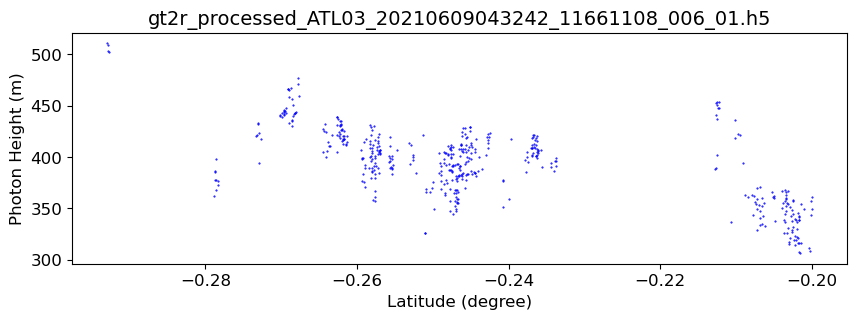

   Latitude  Longitude  Photon_Height  Along_track_distance  signal_conf_ph  \
0 -0.201164  11.621191      87.860977             16.232929               0   
1 -0.201275  11.621166     182.479797              8.629001               0   
2 -0.201365  11.621198     -85.209435             18.162977               0   
3 -0.201520  11.621077     609.781128             16.554949               0   
4 -0.204498  11.620863      68.553329              5.699846               0   

                    geometry  
0  POINT (11.62119 -0.20116)  
1  POINT (11.62117 -0.20127)  
2  POINT (11.62120 -0.20136)  
3  POINT (11.62108 -0.20152)  
4  POINT (11.62086 -0.20450)  


In [22]:
for file in files[:1]:
    #if 'processed_ATL03_20190502040024_05170314_006_02.h' in f:
    for b in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
                plot_photon(beam=b, file=file)
#gdf.to_parquet('test_data/test.parquet')